# Week 10: Classification II

## One Hot Encoding

See Week 10 - One Hot Encoding

## Binary Logistic Regression Review

### Linear Regression

$y = \beta_0 + \beta_1X_1 + ... + \beta_nX_n$

y = -0.6973485609624229 + 0.22912882976355659X


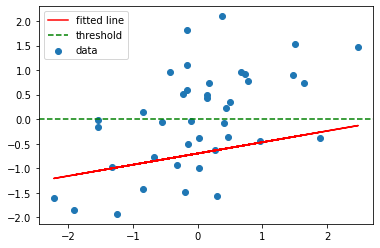

In [1]:
# create and train the model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_regression(n_samples=50, n_features=1, noise=10)
df = pd.DataFrame(data=X, columns=['x'])
df['y'] = y

scaler = StandardScaler()
df[['x', 'y']] = scaler.fit_transform(df[['x', 'y']])

# decision threshold = .5
df['class'] = df['y'].apply(lambda x: 0 if x <= 0 else 1)

X_train, X_test, y_train, y_test = train_test_split(df.drop(['y'], axis=1), df['y'], test_size=.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# test set prediction results
predictions = model.predict(X_test)
print(f'y = {model.intercept_} + {model.coef_[0]}X')

plt.scatter(X_train['x'], y_train, label='data')
plt.plot(X_train['x'], model.intercept_ + model.coef_[0] * X_train['x'], color='red', label='fitted line')
plt.axhline(0, color='green', linestyle='dashed', label='threshold')
plt.legend();

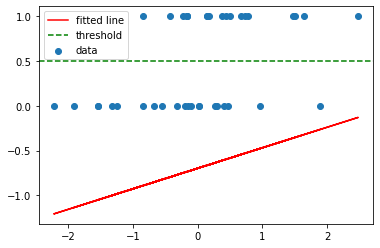

In [2]:
plt.scatter(X_train['x'], X_train['class'], label='data')
plt.plot(X_train['x'], model.intercept_ + model.coef_[0] * X_train['x'], color='red', label='fitted line')
plt.axhline(.5, color='green', linestyle='dashed', label='threshold')
plt.legend();

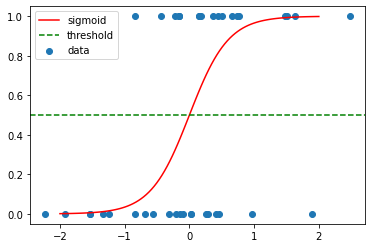

In [3]:
# what we'd really like
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-2, 2, 100)
s = .3 # scale parameter
plt.scatter(X_train['x'], X_train['class'], label='data')
plt.plot(x, 1 / (1 + np.exp(-(np.mean(x)/s + (1/s)*x))), color='red', label='sigmoid')
plt.axhline(.5, color='green', linestyle='dashed', label='threshold')
plt.legend()
plt.show()

### Probability

$P(y=1) = \beta_0 + \beta_1 X$

### Odds

$\large{\frac{p}{1 - p}} = \beta_0 + \beta_1 X$

Odds are positive so we have a range of 0, $+ \infty$ so we use log

### Log Odds

$\large{log(\frac{p}{1 - p}}) = \beta_0 + \beta_1 X$

Now our range is unrestricted $- \infty, + \infty$ where the odds for and odds against meet at 0 with potential symmetrical range 0 to infinity. See images at https://towardsdatascience.com/https-towardsdatascience-com-what-and-why-of-log-odds-64ba988bf704

In binomial logistic regression, the dependent variable takes only two values, which can be coded 0 and 1. So, it can't be that $Y=b0+b1X$ because that could result in any value. The logit transformation solves this problem.

We take the odds to make the value continuous. We take the odds ratio to get a parameter estimate and we take the log of that ratio to make the variable range from negative infinity to infinity and be symmetric around 0 instead of 1.

Peter Flom (https://stats.stackexchange.com/users/686/peter-flom), Why $\log(\frac{p}{1-p}) = b_0+b_1x $ in Logistic regression, URL (version: 2017-09-25): https://stats.stackexchange.com/q/304844

### The Sigmoid

A wide variety of sigmoid functions including the logistic and hyperbolic tangent functions have been used as the activation function of artificial neurons. Sigmoid curves are also common in statistics as cumulative distribution functions (which go from 0 to 1), such as the integrals of the logistic density, the normal density, and Student's t probability density functions. The logistic sigmoid function is invertible, and its inverse is the logit function. 

https://en.wikipedia.org/wiki/Sigmoid_function

Sigmoidal growth is a modification of exponential growth in which the percent change gets smaller as the population approaches the carrying capacity.

http://matcmath.org/textbooks/quantitativereasoning/sigmoidal-growth/

### The Exponential

The function $y = e^x$ gives a curve at which the slope at any value x is also the value of y, which means the derivative is equal to the function itself, or $f'(e^x) = e^x$. Exponentials are also used to express growth which is instrumental with the sigmoid function.

https://www.ml-science.com/eulers-number


In [4]:
# log odds example
import math

p = .2
odds = p/(1-p)
print('.2/.8 =', odds)
print('log(.25) =', math.log(odds))

.2/.8 = 0.25
log(.25) = -1.3862943611198906


In [5]:
# https://www.statisticshowto.com/log-odds/
import pandas as pd
import math

d = {'Probs': [.1, .2, .3, .4, .5, .6, .7, .8, .9]}
log_odds = pd.DataFrame(d)
log_odds['Odds'] = log_odds['Probs']/(1 - log_odds['Probs'])
log_odds['Log Odds'] = log_odds['Odds'].apply(lambda x: math.log(x))
log_odds.head(9)

,Probs,Odds,Log Odds
0,0.1,0.111111,-2.197225
1,0.2,0.250000,-1.386294
2,0.3,0.428571,-0.847298
3,0.4,0.666667,-0.405465
4,0.5,1.000000,0.000000
5,0.6,1.500000,0.405465
6,0.7,2.333333,0.847298
7,0.8,4.000000,1.386294
8,0.9,9.000000,2.197225


### Logistic Function

* $p(y=1) = \beta_0 + \beta_1x$
* $\frac{p}{1 - p} = \beta_0 + \beta_1x$ # bounded by 0
* $log(\frac{p}{1 - p}) = \beta_0 + \beta_1x$ # what we want because it is unbounded
* $e^{ln[\frac{p}{1-p}]} = e^{\beta_0 + \beta_1x}$
* $\frac{p}{1-p} = e^{\beta_0 + \beta_1x}$
* $p = e^{\beta_0 + \beta_1x} - pe^{\beta_0 + \beta_1x}$
* $= p[\frac{e^{\beta_0 + \beta_1x}}{p} - e^{\beta_0 + \beta_1x}]$
* $p[1 + e^{\beta_0 + \beta_1x}] = e^{\beta_0 + \beta_1x}$
* $= \frac{e^{\beta_0 + \beta_1x}}{1 + e^{\beta_0 + \beta_1x}}$
* $= \large{\frac{1}{1 + e^{-(\beta_0 + \beta_1x + ...)}}}$
* $= \large{\frac{1}{1 + e^{-(x)}}}$

https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/

Logistic functions are used in logistic regression to model how the probability $p$ of an event may be affected by one or more explanatory variables: an example would be to have the model $p = f(a + bx)$, where $x$ is the explanatory variable, $a$ and $b$ are model parameters to be fitted, and $f$ is the standard logistic function.

https://en.wikipedia.org/wiki/Logistic_function#In_statistics_and_machine_learning

* $f(x) = \large{\frac{1}{1 + e^{-(x)}}}$

## Make Classification

In [6]:
# Create dataset
import pandas as pd
from sklearn.datasets import make_classification

n = 1000 # number of observations
f = 2 # number of features
inform = 2 # number of meaningful features

# unpack X and y
features, binary_class = make_classification(n_samples=n, n_features=f,  
                                             n_informative=inform, n_redundant=0, 
                                             n_clusters_per_class=1, random_state=42)

# Create a dataframe of the features and add the binary class (label, output)
df = pd.DataFrame(features)
df.columns = ['Feature_1', 'Feature_2']
df['Class'] = binary_class
df.head()

,Feature_1,Feature_2,Class
0,0.601034,1.535353,1
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,0.753178,0.787514,1


In [7]:
# get our parameters
from statsmodels.formula.api import logit

model = logit(formula='Class ~ Feature_1 + Feature_2', data=df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.242088
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Sun, 06 Nov 2022   Pseudo R-squ.:                  0.6507
Time:                        12:02:18   Log-Likelihood:                -242.09
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                1.283e-196
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1197      0.365      3.070      0.002       0.405       1.834
Feature_1     -0.4561      0.171     -2.673      0.008      -0.790      -0.122
Feature_2      3.4780      0.237     14.649      0.000       3.013       3.943
==============================================================================
"""

### Logistic Model

In statistics, the logistic model (or logit model) is a statistical model that models the probability of an event taking place by having the log-odds for the event be a linear combination of one or more independent variables. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (the coefficients in the linear combination). 

* $p = \large{\frac{1}{1 + e^{-(\beta_0 + \beta_1x)}}}$

* https://en.wikipedia.org/wiki/Logistic_regression
* https://en.m.wikipedia.org/wiki/Logistic_function

In [8]:
import numpy as np

print(model.params)
def logistic_function(row):
    b0 = model.params.Intercept
    b1 = model.params.Feature_1
    b2 = model.params.Feature_2
    
    x1 = row['Feature_1']
    x2 = row['Feature_2']
    
    return 1 / (1 + np.exp(-(b0+(b1*x1)+(b2*x2))))

df['p'] = df.apply(logistic_function, axis=1)
df['Predicted'] =  df['p'].apply(lambda x: 0 if x < .5 else 1)
df['Odds'] = df['p']/(1 - df['p'])
df['Log Odds'] = df['Odds'].apply(lambda x: math.log(x))
df.head()

Intercept    1.119669
Feature_1   -0.456101
Feature_2    3.478029
dtype: float64


,Feature_1,Feature_2,Class,p,Predicted,Odds,Log Odds
0,0.601034,1.535353,1,0.997945,1,485.673902,6.185537
1,0.755945,-1.172352,0,0.035482,0,0.036788,-3.302593
2,1.354479,-0.948528,0,0.057480,0,0.060985,-2.797120
3,3.103090,0.233485,0,0.626309,1,1.676007,0.516414
4,0.753178,0.787514,1,0.971116,1,33.620678,3.515141


### Logit

A Logit function, also known as the log-odds function, is a function that represents probability values from 0 to 1, and negative infinity to infinity.

* https://deepai.org/machine-learning-glossary-and-terms/logit
* https://en.m.wikipedia.org/wiki/Logit

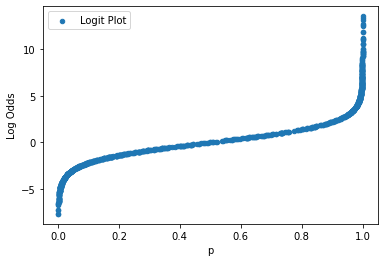

In [9]:
# logit curve
import matplotlib.pyplot as plt

df.plot.scatter(x='p', y='Log Odds', label='Logit Plot')
plt.show()

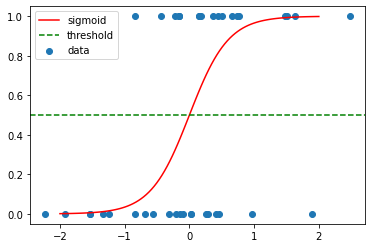

In [10]:
# logit curve reshapes what we saw earlier
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-2, 2, 100)
s = .3 # scale parameter
plt.scatter(X_train['x'], X_train['class'], label='data')
plt.plot(x, 1 / (1 + np.exp(-(np.mean(x)/s + (1/s)*x))), color='red', label='sigmoid')
plt.axhline(.5, color='green', linestyle='dashed', label='threshold')
plt.legend()
plt.show()

### Logit vs Sigmoid

The inverse of the logit curve is the inverse-logit or sigmoid function. The sigmoid function transforms the numbers ( -∞ to +∞ ) back to values between 0 and 1.

* https://ajaytech.co/python-logistic-regression/

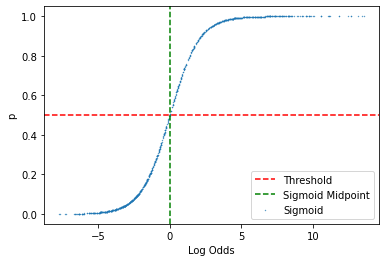

In [11]:
import matplotlib.pyplot as plt

df.plot.scatter(x='Log Odds', y='p', marker='.', s=.5, label='Sigmoid')
plt.axhline(y=.5, color='red', linestyle='dashed', label='Threshold')
plt.axvline(x=0, color='green', linestyle='dashed', label='Sigmoid Midpoint')
plt.legend()
plt.show()

* Logistic regression algorithm: $f(x) = \large{\frac{1}{1 + e^{-x}}}$
* x = $\beta_0 + \beta_1X_1 + \beta_2X_2$
* If $x > 0$ then $\frac{1}{1 + e^{-x}} > .5$
* If $x < 0$ then $\frac{1}{1 + e^{-x}} < .5$

## Model Comparisons

In [12]:
# get data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

comparisons = pd.read_csv('https://raw.githubusercontent.com/sudarshan-koirala/K-Nearest-Neighbors-Social-Network-Ads/master/Social_Network_Ads.csv')
print(comparisons.shape)
print(comparisons.head())

(400, 5)
    User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0


In [13]:
print(comparisons.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB
None


In [14]:
# get X and y and train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(comparisons.drop(['User ID', 'Gender', 'Purchased'], axis=1), 
                                                    comparisons.Purchased, 
                                                    test_size=0.2, random_state=42)

In [15]:
# scale data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train.values)
X_test = sc.transform(X_test.values)

## Logistic Regression

[[50  2]
 [ 9 19]]
0.8625


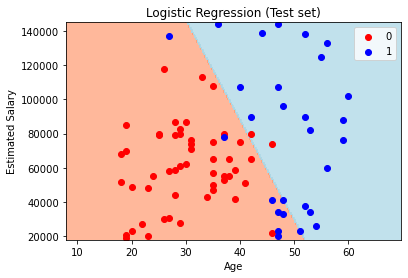

In [16]:
# model, predict, evaluate, and plot
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(X1, X2, model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('lightsalmon', 'lightblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'blue'))(i), label = j)
    
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Confusion Matrix, Imbalanced Classes, and Precision Recall Tradeoff

See Week 10 - Credit Card

## Multinomial Logistic Regression

See Week 10 - Multinomial Logistic Regression

## K Nearest Neighbor

* https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm#/media/File:KnnClassification.svg
* Choose the number of K neighbors
* Within the perimeter, count the number of each class
* New data point is assigned the class with the highest count

In [17]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[48  4]
 [ 3 25]]
0.9125


## Support Vector Classifier

* https://en.wikipedia.org/wiki/Support-vector_machine#/media/File:SVM_margin.png
* Linearly separable
* Identify the hyperplane (similar to line of best fit used in regression)
* Find the support vectors
* Maximize the margin
* Identify negative and positive hyperplanes
* Compares apples that look like oranges and vice versa that reside near the margin (support vectors)


In [18]:
from sklearn.svm import SVC

model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[50  2]
 [ 9 19]]
0.8625


## SVC with Kernel

In [19]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[47  5]
 [ 1 27]]
0.925


## More on Support Vectors

See Week 10 - Support Vectors

## Naive Bayes


In [20]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[50  2]
 [ 3 25]]
0.9375


## More on Naive Bayes

See Week 10 - Naive Bayes

## Decision Tree Classifier

* https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html

#### Terms

* Root node
* Splitting
* Decision node
* Leaf / terminal node
* Pruning
* Branch
* Parent and child nodes

#### Attribute Selection Measures

* Gini index
* Entropy
* Information gain
* Gain ratio
* Reduction in variance
* Chi-square

More next week

In [21]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[46  6]
 [ 7 21]]
0.8375


## Random Forest Classifier

* Random sample of X_train when building trees
* Random subsets of features
* Bagging

More next week

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[47  5]
 [ 6 22]]
0.8625
